<a href="https://colab.research.google.com/github/Devan7117/Sedan-vs-Pickup-Truck/blob/main/cars%26trucks2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download('https://www.kaggle.com/competitions/image-classifications/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: daniintellipaat
Your Kaggle Key: ··········


100%|██████████| 79.1M/79.1M [00:01<00:00, 78.0MB/s]



Extracting archive ./image-classifications/image-classifications.zip to ./image-classifications


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('/content/image-classifications/train.csv')

In [6]:
df

ID    1    2    3    4    5    6    7    8    9  ...  65528  65529  \
0      201  135  133  131  130  130  130  129  128  126  ...     55     52   
1      202  190  212  211  200  204  234  253  253  254  ...     48     58   
2      203  228  227  226  223  221  219  217  215  212  ...     49     49   
3      204  216  216  216  216  216  216  216  216  216  ...    169    181   
4      205  196  189  164  199  200  199  198  197  196  ...    111    115   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
1015  1216   94   98  103  109  111  110  105  102  101  ...     47     41   
1016  1217  252  253  253  253  253  253  252  251  253  ...    192    197   
1017  1218   46   50   65  101   93  133   30   33   64  ...    152    177   
1018  1219  255  255  255  255  255  255  255  255  255  ...    184    182   
1019  1220   86   86   88   89   91   93   93   91   91  ...     71     71   

      65530  65531  65532  65533  65534  65535  65536  Class  
0        55     52     52     54     52     52     52      0  
1        49     45     93     89     64     42     48      1  
2        49     49     50     50     50     50     50      1  
3       182    181    178    168    160    167    170      1  
4       115    122    130    121    125    125    121      1  
...     ...    ...    ...    ...    ...    ...    ...    ...  
1015     45     32     25     25     25     24     23      0  
1016    191    173    147    146    189    209    194      0  
1017    157    103     78     79     77     76     82      0  
1018    169    173    187    189    192    209    228      1  
1019     71     72     72     73     73     72    102      0  

[1020 rows x 65538 columns]

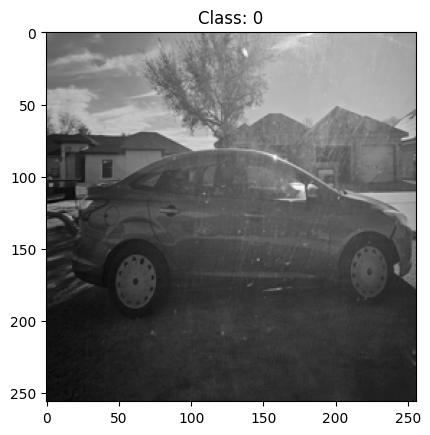

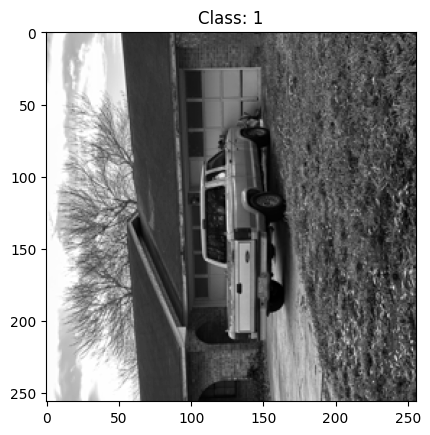

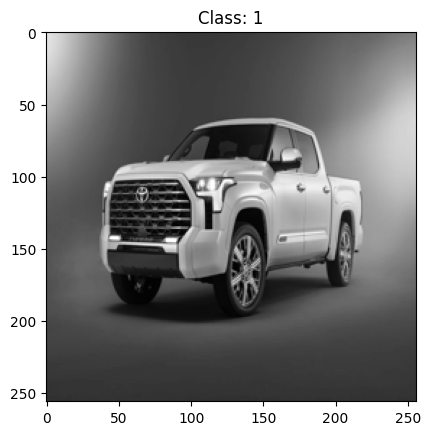

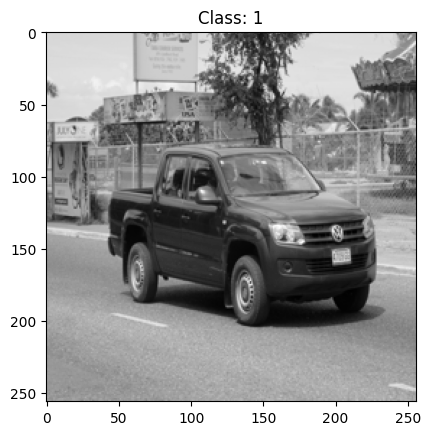

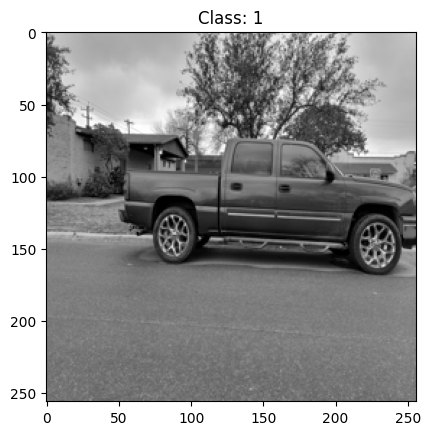

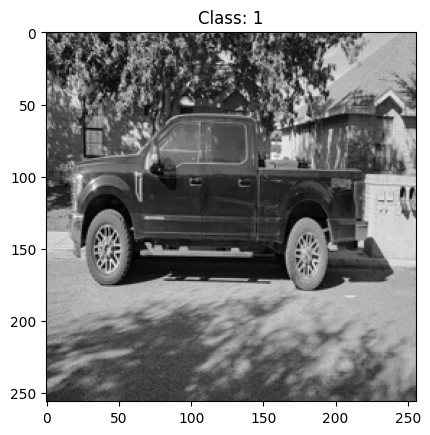

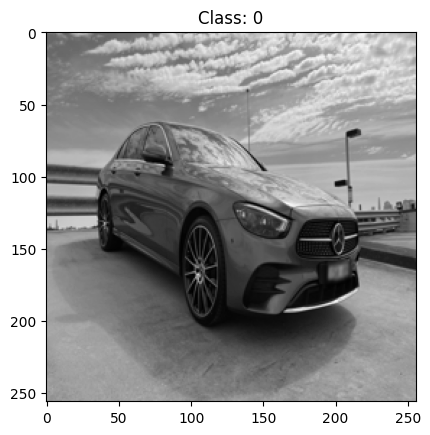

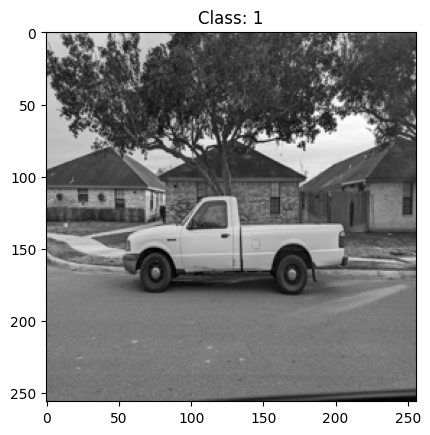

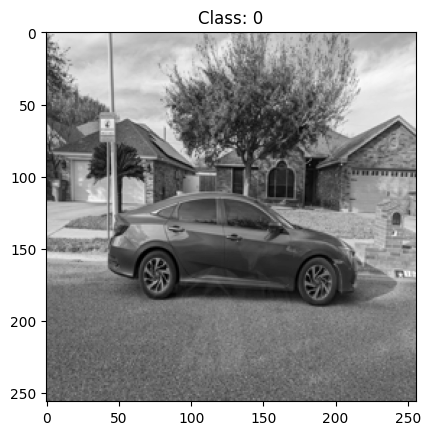

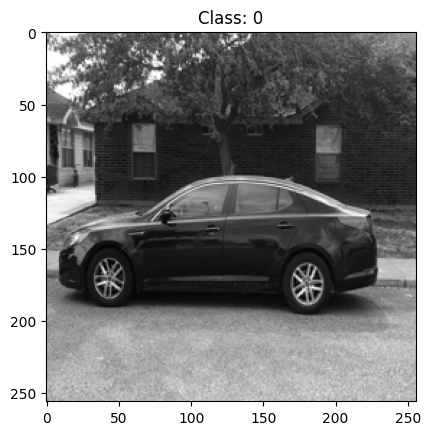

In [7]:
pixels = df.drop(columns=['ID', 'Class'])
class_labels = df['Class']

# Assuming the images are square, find the side length (assuming they are square)
image_side_length = int(np.sqrt(len(pixels.columns)))

# Reshape the pixel values to image dimensions
images = pixels.values.reshape(-1, image_side_length, image_side_length)

# Display a few images along with their class labels
num_images_to_display = 10
for i in range(num_images_to_display):
    plt.imshow(images[i], cmap='gray')  # Assuming grayscale images
    plt.title(f'Class: {class_labels[i]}')
    plt.show()

In [8]:
df.isnull().sum()

ID       0
1        0
2        0
3        0
4        0
        ..
65533    0
65534    0
65535    0
65536    0
Class    0
Length: 65538, dtype: int64

In [9]:
df.shape

(1020, 65538)

In [10]:
class_labels.shape

(1020,)

In [11]:
labels = np.asarray(class_labels)
data = np.asarray(df)

In [12]:
data

array([[ 201,  135,  133, ...,   52,   52,    0],
       [ 202,  190,  212, ...,   42,   48,    1],
       [ 203,  228,  227, ...,   50,   50,    1],
       ...,
       [1218,   46,   50, ...,   76,   82,    0],
       [1219,  255,  255, ...,  209,  228,    1],
       [1220,   86,   86, ...,   72,  102,    0]])

In [13]:
data.shape

(1020, 65538)

In [14]:
labels

array([0, 1, 1, ..., 0, 1, 0])

In [15]:
labels.shape

(1020,)

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2, shuffle=True,stratify=labels)

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [49]:
RF=RandomForestClassifier()

In [50]:
RF.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
y_pred=RF.predict(x_test)

In [52]:
accuracy_score(y_test,y_pred)

0.7058823529411765

In [53]:
y_pred

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0])

In [54]:
test=pd.read_csv('/content/image-classifications/test.csv')

In [55]:
test

ID    1    2    3    4    5    6    7    8    9  ...  65527  65528  \
0      1  189  191  197  201  204  198  195  198  199  ...    153    117   
1      2  173  177  182  187  188  190  195  211  204  ...    201    215   
2      3   95   97   99   97   93   94   94   92   92  ...    167    160   
3      4  216  216  217  218  217  217  220  221  222  ...     76     70   
4      5   84   82   57  113  101   83   65  139   87  ...    159    158   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
195  196  202  202  202  202  202  202  202  201  202  ...    210    210   
196  197  187  191  190  186  186  188  188  188  182  ...     53     51   
197  198  165  168  169  169  171  172  174  175  175  ...    146    145   
198  199  237  236  235  236  238  239  236  233  231  ...    150    142   
199  200  153  111  106   81  194  238  214  154  147  ...    184    185   

     65529  65530  65531  65532  65533  65534  65535  65536  
0      156    144    145    147    148    182    167    174  
1      217    205    202    206    207    202    203    195  
2      161    174    189    179    175    185    172    157  
3       77    102     96     86    103    109     83     86  
4      153    148    171    193    149    136    153    154  
..     ...    ...    ...    ...    ...    ...    ...    ...  
195    211    210    212    210    210    209    208    209  
196     46     77    111    119    183    150    110    108  
197    142    154    141    141    142    134    152    154  
198    147    150    154    149    162    151    151    149  
199    181    189    191    192    184    182    185    189  

[200 rows x 65537 columns]

In [56]:
test=pd.DataFrame(test)

In [57]:
test

ID    1    2    3    4    5    6    7    8    9  ...  65527  65528  \
0      1  189  191  197  201  204  198  195  198  199  ...    153    117   
1      2  173  177  182  187  188  190  195  211  204  ...    201    215   
2      3   95   97   99   97   93   94   94   92   92  ...    167    160   
3      4  216  216  217  218  217  217  220  221  222  ...     76     70   
4      5   84   82   57  113  101   83   65  139   87  ...    159    158   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
195  196  202  202  202  202  202  202  202  201  202  ...    210    210   
196  197  187  191  190  186  186  188  188  188  182  ...     53     51   
197  198  165  168  169  169  171  172  174  175  175  ...    146    145   
198  199  237  236  235  236  238  239  236  233  231  ...    150    142   
199  200  153  111  106   81  194  238  214  154  147  ...    184    185   

     65529  65530  65531  65532  65533  65534  65535  65536  
0      156    144    145    147    148    182    167    174  
1      217    205    202    206    207    202    203    195  
2      161    174    189    179    175    185    172    157  
3       77    102     96     86    103    109     83     86  
4      153    148    171    193    149    136    153    154  
..     ...    ...    ...    ...    ...    ...    ...    ...  
195    211    210    212    210    210    209    208    209  
196     46     77    111    119    183    150    110    108  
197    142    154    141    141    142    134    152    154  
198    147    150    154    149    162    151    151    149  
199    181    189    191    192    184    182    185    189  

[200 rows x 65537 columns]

In [58]:
pred=pd.DataFrame(y_pred)

In [59]:
pred

0
0    1
1    1
2    0
3    0
4    0
..  ..
199  1
200  0
201  0
202  0
203  0

[204 rows x 1 columns]

In [60]:
test['pred']=pred

In [61]:
test

ID    1    2    3    4    5    6    7    8    9  ...  65528  65529  \
0      1  189  191  197  201  204  198  195  198  199  ...    117    156   
1      2  173  177  182  187  188  190  195  211  204  ...    215    217   
2      3   95   97   99   97   93   94   94   92   92  ...    160    161   
3      4  216  216  217  218  217  217  220  221  222  ...     70     77   
4      5   84   82   57  113  101   83   65  139   87  ...    158    153   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
195  196  202  202  202  202  202  202  202  201  202  ...    210    211   
196  197  187  191  190  186  186  188  188  188  182  ...     51     46   
197  198  165  168  169  169  171  172  174  175  175  ...    145    142   
198  199  237  236  235  236  238  239  236  233  231  ...    142    147   
199  200  153  111  106   81  194  238  214  154  147  ...    185    181   

     65530  65531  65532  65533  65534  65535  65536  pred  
0      144    145    147    148    182    167    174     1  
1      205    202    206    207    202    203    195     1  
2      174    189    179    175    185    172    157     0  
3      102     96     86    103    109     83     86     0  
4      148    171    193    149    136    153    154     0  
..     ...    ...    ...    ...    ...    ...    ...   ...  
195    210    212    210    210    209    208    209     1  
196     77    111    119    183    150    110    108     0  
197    154    141    141    142    134    152    154     0  
198    150    154    149    162    151    151    149     1  
199    189    191    192    184    182    185    189     1  

[200 rows x 65538 columns]

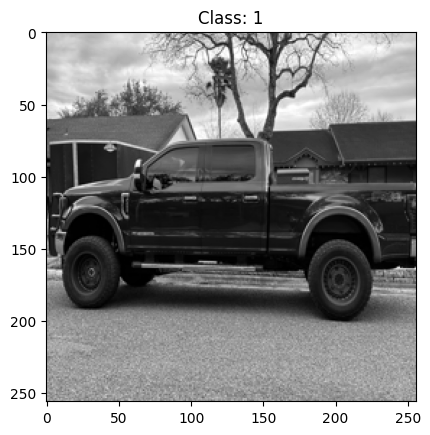

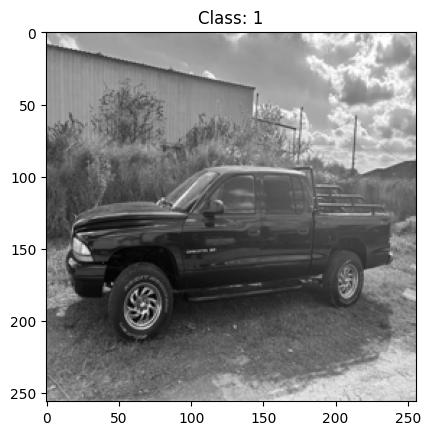

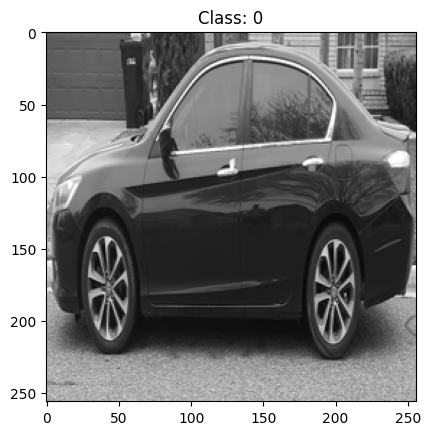

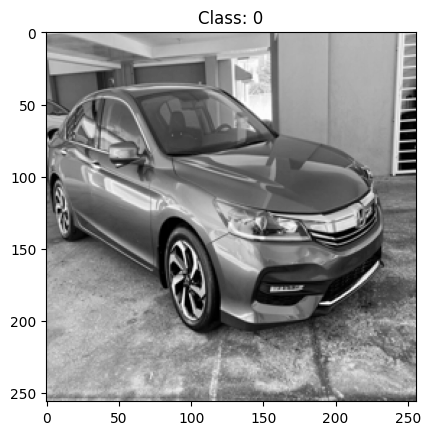

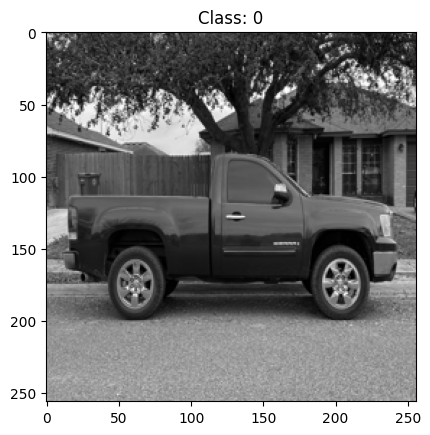

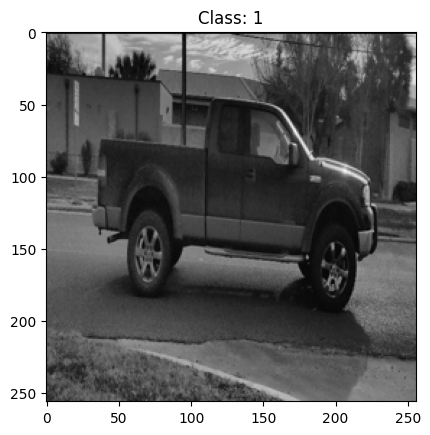

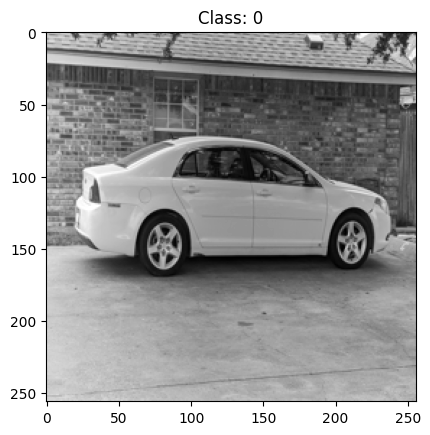

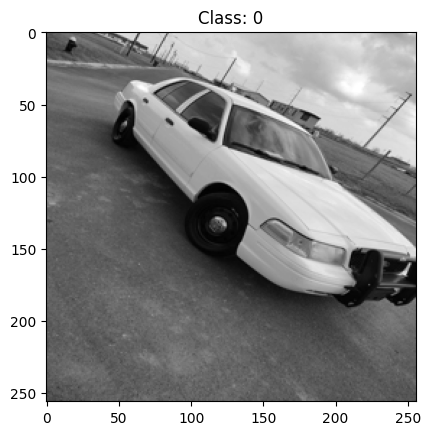

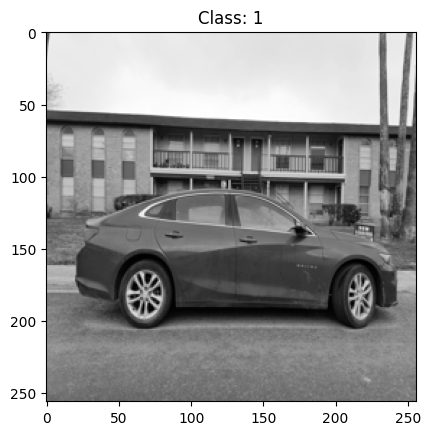

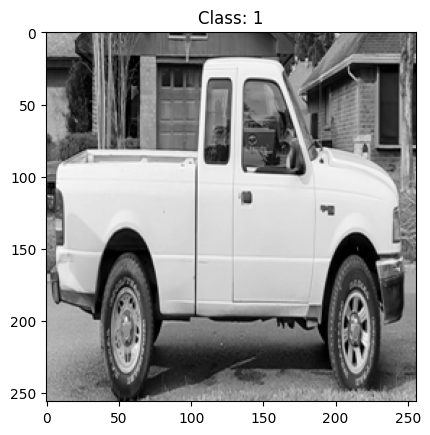

In [62]:
pixels = test.drop(columns=['ID', 'pred'])
class_labels = test['pred']

# Assuming the images are square, find the side length (assuming they are square)
image_side_length = int(np.sqrt(len(pixels.columns)))

# Reshape the pixel values to image dimensions
images = pixels.values.reshape(-1, image_side_length, image_side_length)

# Display a few images along with their class labels
num_images_to_display = 10
for i in range(num_images_to_display):
    plt.imshow(images[i], cmap='gray')  # Assuming grayscale images
    plt.title(f'Class: {class_labels[i]}')
    plt.show()

In [63]:
parameters=[{'max_depth':np.arange(4,10),
             'min_samples_split':np.arange(2,5),
             'random_state':[3]}]

In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
#Define Search
search=RandomizedSearchCV(RF,parameters,scoring='accuracy')

In [66]:
#Execute the search
result=search.fit(x_train,y_train)

In [67]:
result.best_score_

0.6911641478377973

In [68]:
best=result.best_params_

In [69]:
best

{'random_state': 3, 'min_samples_split': 4, 'max_depth': 6}

In [70]:
rf=RandomForestClassifier(**best)

In [71]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_split=4, random_state=3)

In [72]:
y_pred=rf.predict(x_test)

In [73]:
accuracy_score(y_test,y_pred)

0.7303921568627451

In [74]:
new_pred=pd.DataFrame(y_pred)
new_pred

0
0    1
1    1
2    0
3    0
4    0
..  ..
199  0
200  0
201  0
202  0
203  0

[204 rows x 1 columns]

In [77]:
test=test.drop(columns='pred')

In [78]:
test['new_pred']=new_pred
test

ID    1    2    3    4    5    6    7    8    9  ...  65528  65529  \
0      1  189  191  197  201  204  198  195  198  199  ...    117    156   
1      2  173  177  182  187  188  190  195  211  204  ...    215    217   
2      3   95   97   99   97   93   94   94   92   92  ...    160    161   
3      4  216  216  217  218  217  217  220  221  222  ...     70     77   
4      5   84   82   57  113  101   83   65  139   87  ...    158    153   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
195  196  202  202  202  202  202  202  202  201  202  ...    210    211   
196  197  187  191  190  186  186  188  188  188  182  ...     51     46   
197  198  165  168  169  169  171  172  174  175  175  ...    145    142   
198  199  237  236  235  236  238  239  236  233  231  ...    142    147   
199  200  153  111  106   81  194  238  214  154  147  ...    185    181   

     65530  65531  65532  65533  65534  65535  65536  new_pred  
0      144    145    147    148    182    167    174         1  
1      205    202    206    207    202    203    195         1  
2      174    189    179    175    185    172    157         0  
3      102     96     86    103    109     83     86         0  
4      148    171    193    149    136    153    154         0  
..     ...    ...    ...    ...    ...    ...    ...       ...  
195    210    212    210    210    209    208    209         1  
196     77    111    119    183    150    110    108         0  
197    154    141    141    142    134    152    154         0  
198    150    154    149    162    151    151    149         1  
199    189    191    192    184    182    185    189         0  

[200 rows x 65538 columns]

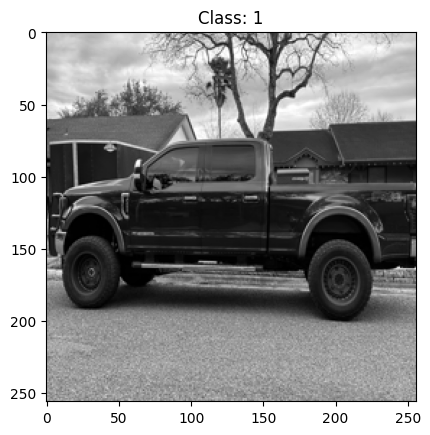

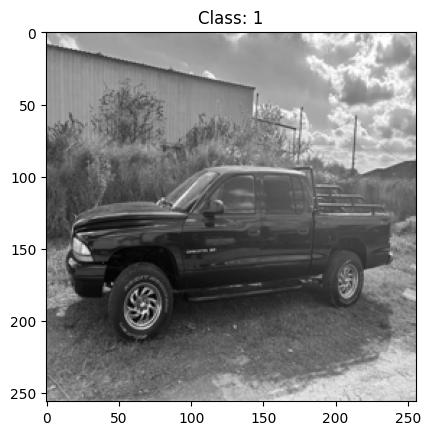

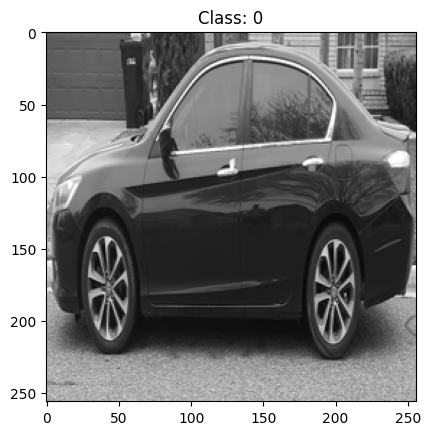

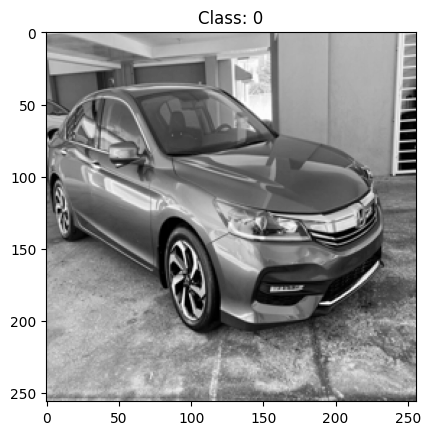

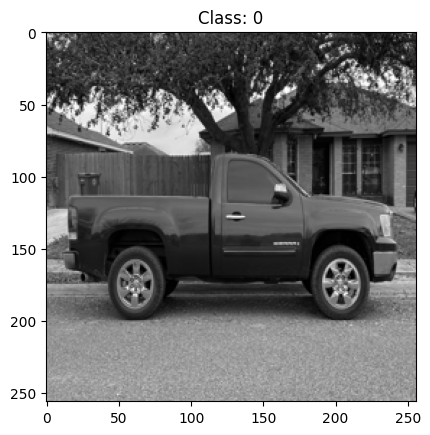

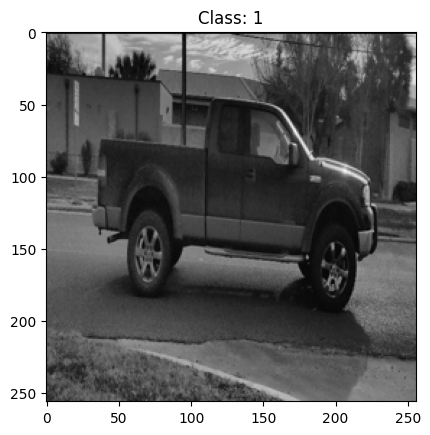

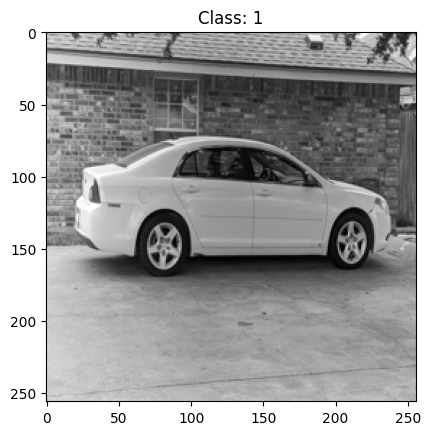

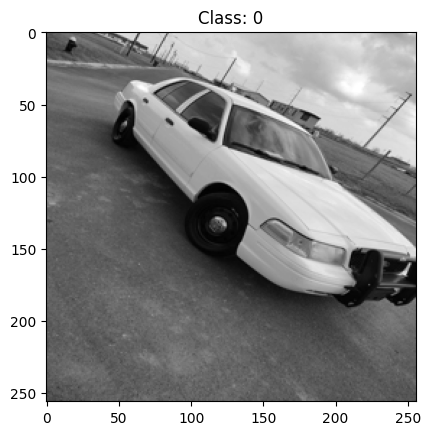

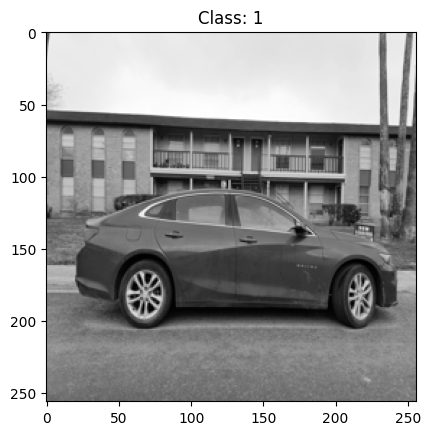

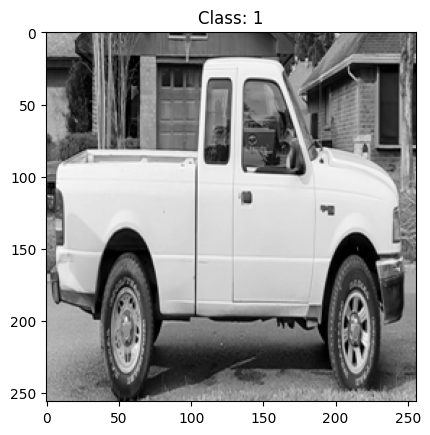

In [79]:
pixels = test.drop(columns=['ID', 'new_pred'])
class_labels = test['new_pred']

# Assuming the images are square, find the side length (assuming they are square)
image_side_length = int(np.sqrt(len(pixels.columns)))

# Reshape the pixel values to image dimensions
images = pixels.values.reshape(-1, image_side_length, image_side_length)

# Display a few images along with their class labels
num_images_to_display = 10
for i in range(num_images_to_display):
    plt.imshow(images[i], cmap='gray')  # Assuming grayscale images
    plt.title(f'Class: {class_labels[i]}')
    plt.show()